<<< [Index](Index.ipynb)

## [Classification](#c)
* [Supervised learning](#Sl)
* [Which of these is a classification problem?](#Wotiacp)
* [Exploratory data analysis](#Eda)
* [Numerical EDA](#NE)
* [Visual EDA](#VE)
* [The classification challenge](#Tcc)
* [k-Nearest Neighbors: Fit](#kNF)
* [k-Nearest Neighbors: Predict](#kNP)
* [Measuring model performance](#Mmp)
* [The digits recognition dataset](#Tdrd)
* [Train/Test Split + Fit/Predict/Accuracy](#TS+F)
* [Overfitting and underfitting](#Oau)


## [Regression](#r)
* [Introduction to regression](#Itr)
* [Which of the following is a regression problem?](#Wotfiarp)
* [Importing data for supervised learning](#Idfsl)
* [Exploring the Gapminder data](#EtGd)
* [The basics of linear regression](#Tbolr)
* [Fit & predict for regression](#F&pfr)
* [Train/test split for regression](#Tsfr)
* [Cross-validation](#C)
* [5-fold cross-validation](#5c)
* [K-Fold CV comparison](#KCc)
* [Regularized regression](#Rr)
* [Regularization I: Lasso](#RIL)
* [Regularization II: Ridge](#RIR)

## [Fine tuning your model](#ftm)
* [How good is your model?](#Hgiym)
* [Metrics for classification](#Mfc)
* [Logistic regression and the ROC curve](#LratRc)
* [Building a logistic regression model](#Balrm)
* [Plotting an ROC curve](#PaRc)
* [Precision-recall Curve](#PC)
* [Area under the ROC curve](#AutRc)
* [AUC computation](#Ac)
* [Hyperparameter tuning](#Ht)
* [Hyperparameter tuning with GridSearchCV](#HtwG)
* [Hyperparameter tuning with RandomizedSearchCV](#HtwR)
* [Hold-out set for final evaluation](#Hsffe)
* [Hold-out set reasoning](#Hsr)
* [Hold-out set in practice I: Classification](#HsipIC)
* [Hold-out set in practice II: Regression](#HsipIR)

## [Preprocessing and pipelines](#pp)
* [Preprocessing data](#Pd)
* [Exploring categorical features](#Ecf)
* [Creating dummy variables](#Cdv)
* [Regression with categorical features](#Rwcf)
* [Handling missing data](#Hmd)
* [Dropping missing data](#Dmd)
* [Imputing missing data in a ML Pipeline I](#ImdiaMPI)
* [Imputing missing data in a ML Pipeline II](#ImdiaMPI)
* [Centering and scaling](#Cas)
* [Centering and scaling your data](#Casyd)
* [Centering and scaling in a pipeline](#Casiap)
* [Bringing it all together I: Pipeline for classification](#BiatIPfc)
* [Bringing it all together II: Pipeline for regression](#BiatIPfr)
* [Final thoughts](#Ft)

<p id ='Sl'><p>
### Supervised learning

<p id ='Wotiacp'><p>
### Which of these is a classification problem?

<p id ='Eda'><p>
### Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style= 'darkgrid')
import sklearn

In [2]:
df = pd.read_csv('./data/house-votes-84.csv', header=None, na_values='?', names =['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'] )
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [3]:
df = df.fillna(method='ffill')

In [4]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,n,y,y,y,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [5]:
def recode(val):
    if (val =='n'):
        return 0
    elif (val =='y'):
        return 1

In [285]:
for i in range(1, 17):
    
    df.iloc[:, i] = df.iloc[:, i].apply(recode)

In [7]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0.0,1,1,1,0,1
2,democrat,0,1,1,1,1,1,0,0,0,0,1.0,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1.0,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1.0,0,1,1,1,1


In [8]:
df.loc[0, 'synfuels'] = 1

In [9]:
df.tail()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
430,republican,0,0,1,1,1,1,0,0,1,1,0.0,1,1,1,0,1
431,democrat,0,0,1,0,0,0,1,1,1,1,0.0,0,0,0,0,1
432,republican,0,0,0,1,1,1,0,0,0,0,1.0,1,1,1,0,1
433,republican,0,0,0,1,1,1,0,0,0,0,0.0,1,1,1,0,1
434,republican,0,1,0,1,1,1,0,0,0,1,0.0,1,1,1,0,0


### Numerical EDA
<p id ='NE'><p>


### Visual EDA
<p id ='VE'><p>


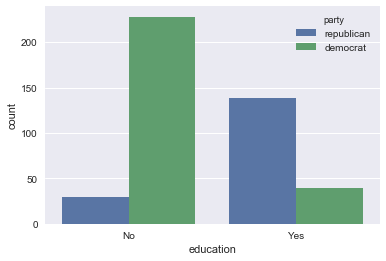

In [10]:
plt.figure()
sns.countplot(x='education', hue='party', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

<p id ='Tcc'><p>
### The classification challenge

<p id ='kNF'><p>
### k-Nearest Neighbors: Fit

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# feature array
X = df.drop('party', axis=1).values

In [13]:
X.shape

(435, 16)

In [14]:
# response variable
y = df.party.values

In [15]:
y.shape

(435,)

In [16]:
knn = KNeighborsClassifier(n_neighbors= 2)

In [17]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

<p id ='kNP'><p>
### k-Nearest Neighbors: Predict

In [18]:
y_pred = knn.predict(X[0].reshape(1, 16))

In [19]:
X[0].shape

(16,)

In [20]:
knn.predict(np.random.randint(2, size = 16).reshape(1, -1))

array(['democrat'], dtype=object)

In [21]:
y_pred = knn.predict(X)

<p id ='Mmp'><p>
### Measuring model performance

In [22]:
from sklearn import datasets

In [23]:
# load the digits datasets
digits = datasets.load_digits()


In [24]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [25]:
digits.images.shape

(1797, 8, 8)

In [26]:
digits['data'].shape

(1797, 64)

In [27]:
digits.target.shape

(1797,)

In [28]:
digits.target[87]

4

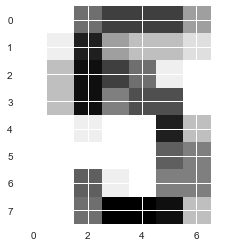

In [29]:
plt.imshow(digits.images[1010], cmap = plt.cm.gray_r, interpolation='nearest')

In [30]:
digits.target[1010]

5

<p id ='Tdrd'><p>
### The digits recognition dataset

<p id ='TS+F'><p>
### Train/Test Split + Fit/Predict/Accuracy

In [31]:
from sklearn.model_selection import train_test_split 

In [32]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y )

In [34]:
X_train.shape

(1437, 64)

In [35]:
X_test.shape

(360, 64)

In [36]:
y_train.shape

(1437,)

In [37]:
y_test.shape

(360,)

In [38]:
knn = KNeighborsClassifier(n_neighbors=7)

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [40]:
knn.score(X_test, y_test)

0.9833333333333333

In [41]:
y_pred = knn.predict(X_test)
y_pred

array([5, 2, 8, 1, 7, 2, 6, 2, 6, 5, 0, 5, 9, 3, 4, 4, 2, 4, 9, 9, 6, 3,
       8, 1, 2, 5, 6, 0, 3, 4, 6, 7, 2, 6, 6, 6, 8, 5, 0, 9, 1, 7, 9, 6,
       5, 7, 5, 2, 7, 5, 0, 1, 5, 5, 3, 2, 4, 0, 0, 2, 7, 5, 6, 1, 3, 7,
       6, 5, 7, 0, 9, 0, 3, 8, 2, 5, 7, 2, 3, 5, 9, 3, 2, 7, 9, 6, 8, 1,
       0, 1, 2, 9, 4, 4, 1, 2, 7, 8, 4, 2, 6, 8, 3, 7, 3, 9, 6, 1, 1, 0,
       9, 2, 1, 6, 3, 4, 8, 7, 1, 0, 0, 4, 6, 5, 8, 2, 8, 1, 3, 0, 0, 8,
       6, 4, 3, 9, 3, 3, 3, 3, 0, 7, 0, 0, 1, 9, 5, 8, 1, 5, 0, 6, 6, 6,
       6, 1, 7, 7, 6, 7, 7, 8, 7, 3, 6, 5, 9, 0, 3, 8, 0, 9, 8, 1, 9, 5,
       9, 5, 8, 9, 9, 7, 9, 1, 9, 5, 4, 7, 3, 0, 4, 9, 7, 7, 5, 6, 5, 8,
       3, 4, 5, 4, 9, 2, 5, 5, 2, 1, 3, 8, 8, 9, 3, 6, 1, 0, 1, 4, 0, 5,
       5, 6, 6, 7, 4, 3, 8, 4, 1, 0, 7, 9, 2, 8, 4, 8, 4, 2, 4, 0, 0, 0,
       2, 6, 7, 0, 4, 5, 2, 2, 9, 0, 4, 6, 8, 2, 3, 9, 2, 3, 0, 6, 8, 7,
       1, 4, 4, 1, 1, 6, 3, 8, 1, 2, 5, 7, 8, 3, 2, 0, 3, 4, 1, 9, 9, 9,
       6, 3, 7, 1, 6, 9, 4, 7, 1, 8, 1, 3, 0, 5, 3,

<p id ='Oau'><p>
### Overfitting and underfitting

In [42]:
neighbours = np.arange(1,9)
neighbours

array([1, 2, 3, 4, 5, 6, 7, 8])

In [43]:
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

### Introduction to regression
<p id ='Itr'><p>


### Which of the following is a regression problem?
<p id ='Wotfiarp'><p>


### Importing data for supervised learning
<p id ='Idfsl'><p>


In [44]:
gapminder = pd.read_csv('./data/gm_2008_region.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [45]:
# feature variable
X_fertility = gapminder.fertility.values.reshape(-1,1)


In [46]:
# target variable
y = gapminder.life.values.reshape(-1, 1)
y.shape

(139, 1)

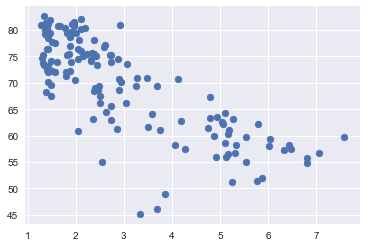

In [47]:
plt.scatter(X_fertility, y)
plt.show()

### Exploring the Gapminder data
<p id ='EtGd'><p>


In [48]:
gapminder.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


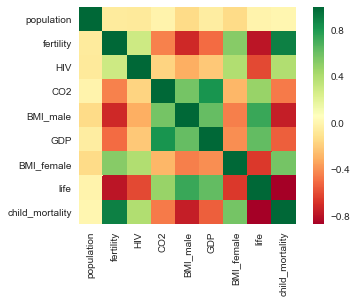

In [49]:
sns.heatmap(gapminder.corr(), square= True, cmap = 'RdYlGn')


### The basics of linear regression
<p id ='Tbolr'><p>


### Fit & predict for regression
<p id ='F&pfr'><p>


Text(0,0.5,'female literacy')

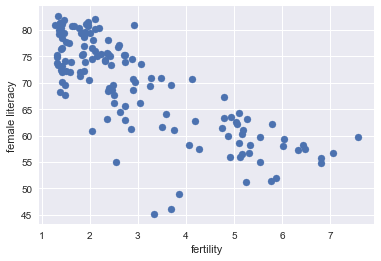

In [50]:
plt.scatter(X_fertility, y)
plt.xlabel('fertility')
plt.ylabel('female literacy')

In [51]:
X_fertility.shape

(139, 1)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
reg = LinearRegression()

In [54]:
# Create the prediction space
prediction_space = np.linspace(np.min(X_fertility), np.max(X_fertility)).reshape(-1,1)


In [55]:
min(X_fertility)

array([1.28])

In [56]:
# Fit the model the data
reg.fit(X_fertility, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
y_pred  = reg.predict(prediction_space)

In [58]:
print(reg.score(X_fertility, y))


0.6192442167740035


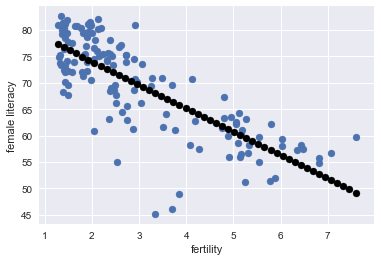

In [59]:
# Plot regression line
plt.scatter(X_fertility, y)
plt.xlabel('fertility')
plt.ylabel('female literacy')
plt.scatter(prediction_space, y_pred, color='black')
plt.show()


### Train/test split for regression
<p id ='Tsfr'><p>


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [61]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fertility, y, test_size = 0.3, random_state = 42)

In [62]:
#Create the regressor
reg_all = LinearRegression()

In [63]:
# Fit the regressor on training data
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# Predict on the test data
y_pred = reg_all.predict(X_test)

In [65]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.7298987360907498


In [66]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [67]:
print("Root Mean Squared Error: {}".format(rmse))


Root Mean Squared Error: 4.194027914110239


### Cross-validation
<p id ='C'><p>


<p id ='5c'><p>
### 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.



In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# Create a Linear regression object
reg = LinearRegression()

In [70]:
# Compute the cross-validation scores
cv_scores = cross_val_score(reg, X_fertility, y, cv = 5)
cv_scores

array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [71]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


Average 5-Fold CV Score: 0.6168819644425119


### K-Fold CV comparison
<p id ='KCc'><p>


In the IPython Shell, you can use `%timeit` to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

In [72]:
%timeit np.mean(2)

10.2 µs ± 438 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [73]:
%timeit cv_scores3 =  cross_val_score(reg, X_fertility, y, cv = 3)


3.26 ms ± 465 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [74]:
%timeit cross_val_score(reg, X_fertility, y, cv =10)

10.3 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


<p id ='Rr'><p>
### Regularized regression

<p id ='RIL'><p>
### Regularization I: Lasso
    
- Can be used to select the important features of the dataset.
- Shrinks the coefficients of less important to exactly ZERO.


In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.



In [75]:
from sklearn.linear_model import Lasso

In [76]:
# Instantiate the lasso regressor
lasso = Lasso(alpha=0.4, normalize=True)

In [77]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [181]:
# Feature Array

feature_df = gapminder.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8]]
X = feature_df.values
X

array([[3.4811059e+07, 2.7300000e+00, 1.0000000e-01, ..., 1.2314000e+04,
        1.2990490e+02, 2.9500000e+01],
       [1.9842251e+07, 6.4300000e+00, 2.0000000e+00, ..., 7.1030000e+03,
        1.3012470e+02, 1.9200000e+02],
       [4.0381860e+07, 2.2400000e+00, 5.0000000e-01, ..., 1.4646000e+04,
        1.1889150e+02, 1.5400000e+01],
       ...,
       [8.6589342e+07, 1.8600000e+00, 4.0000000e-01, ..., 4.0850000e+03,
        1.2193670e+02, 2.6200000e+01],
       [1.3114579e+07, 5.8800000e+00, 1.3600000e+01, ..., 3.0390000e+03,
        1.3244930e+02, 9.4900000e+01],
       [1.3495462e+07, 3.8500000e+00, 1.5100000e+01, ..., 1.2860000e+03,
        1.3197450e+02, 9.8300000e+01]])

In [79]:
feature_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2


In [179]:
# Target Variable
y = gapminder['life'].values
y

array([75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1,
       79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2,
       56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8,
       78.7, 61. , 74. , 70.1, 74.1, 56.7, 60.4, 74. , 65.7, 79.4, 81. ,
       57.5, 62.2, 72.1, 80. , 62.7, 79.5, 70.8, 58.3, 51.3, 63. , 61.7,
       70.9, 73.8, 82. , 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6,
       66.1, 61.5, 72.3, 77.6, 45.2, 61. , 72. , 80.7, 63.4, 51.4, 74.5,
       78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55. , 60.8,
       68.6, 80.3, 80.2, 75.2, 59.7, 58. , 80.7, 74.6, 64.1, 77.1, 58.2,
       73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4,
       55.9, 80.9, 74.8, 78.5, 56.7, 55. , 81.1, 74.3, 67.4, 69.1, 46.1,
       81.1, 81.9, 69.5, 59.7, 74.1, 60. , 71.3, 76.5, 75.1, 57.2, 68.2,
       79.5, 78.2, 76. , 68.7, 75.4, 52. , 49. ])

In [180]:
y.shape

(139,)

In [81]:
lasso.fit(X, y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
lasso_coef = lasso.coef_
lasso_coef

array([-0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.07087587])

In [83]:
%matplotlib auto

Using matplotlib backend: MacOSX


In [84]:
plt.plot(range(len(feature_df.columns)), lasso_coef)

In [85]:
plt.xticks(range(len(feature_df.columns)), feature_df.columns.values, rotation=60)

([<matplotlib.axis.XTick at 0x1a1a2f8898>,
 <a list of 8 Text xticklabel objects>)

<p id ='RIR'><p>
### Regularization II: Ridge

In [86]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
#### Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
alpha_space

<p id ='Hgiym'><p>
### How good is your model?

### Class imbalance example: Emails
* Spam Classification
   * 99% of emails are real; 1% of emails are spam
   
* Could build a classifier that predicts ALL emails real
  * 99% accurate!
  * But horrible classifying spam
  * Fails at its original purpose
  
* Need more nuanced metrics

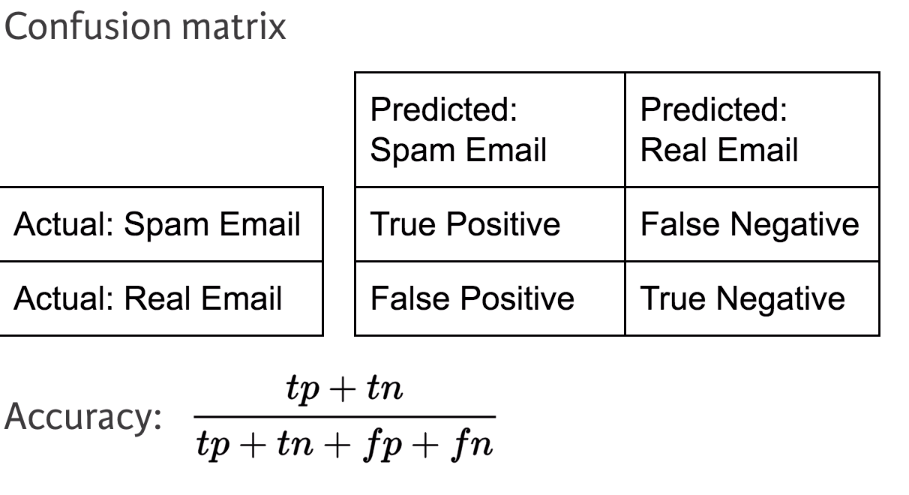

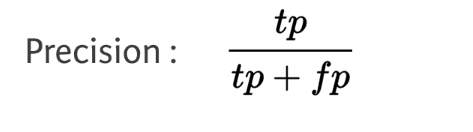

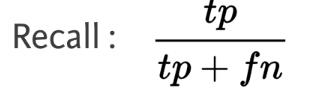

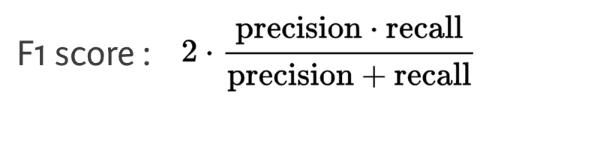

<p id ='Mfc'><p>
### Metrics for classification
Evaluating The performance of binary classifiers by computing a confusion matrix and generating classification report 

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Here, you'll work with the **PIMA Indians dataset** obtained from the UCI Machine Learning Repository. 

The goal is to `predict ` whether or not a given female patient will **contract diabetes** based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. 

A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [89]:
diabetes_df = pd.read_csv('./data/diabetes.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [177]:
#feature array
X = diabetes_df.drop('diabetes', axis = 1)
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [92]:
y = diabetes_df.diabetes

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [94]:
knn = KNeighborsClassifier(n_neighbors=6)


In [95]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [96]:
y_pred = knn.predict(X_test)

In [97]:
print(confusion_matrix(y_test, y_pred))

[[176  30]
 [ 56  46]]


In [98]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



<p id ='LratRc'><p>
### Logistic regression and the ROC curve

<p id ='Balrm'><p>
### Building a logistic regression model

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
log_reg = LogisticRegression()

In [101]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
y_pred = log_reg.predict(X_test)

In [103]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



<p id ='PaRc'><p>
### Plotting an ROC curve

In [104]:
from sklearn.metrics import  roc_curve

In [107]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]


In [108]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [111]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')


In [112]:
plt.plot(fpr, tpr)

In [113]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<p id ='PC'><p>
### Precision-recall Curve

<p id ='AutRc'><p>
### Area under the ROC curve

<p id ='Ac'><p>
### AUC computation

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [115]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8268608414239483


In [118]:
# Compute cross-validated AUC scores: cv_auc
cv_auc =cross_val_score(log_reg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


<p id ='Ht'><p>
### Hyperparameter tuning

<p id ='HtwG'><p>
### Hyperparameter tuning with GridSearchCV

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [120]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space}

In [138]:
c_space[2]

0.0007196856730011522

In [121]:
log_reg = LogisticRegression()

In [122]:
# Instantiate the GridSearchCV object: logreg_cv
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5)

In [174]:
X = diabetes_df.drop('diabetes', axis = 1)

y = diabetes_df.diabetes

In [131]:
log_reg_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [133]:
print("Tuned Logisitic Regression Parameters: {}".format(log_reg_cv.best_params_))

Tuned Logisitic Regression Parameters: {'C': 268.2695795279727}


In [134]:
print('Best Score is {}'.format(log_reg_cv.best_score_))

Best Score is 0.7708333333333334


<p id ='HtwR'><p>
### Hyperparameter tuning with RandomizedSearchCV
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out.
    
Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [141]:
param_dist = {"max_depth":[3, None], "max_features":randint(1,9), "min_samples_leaf":randint(1,9), "criterion":["gini", "entropy"]}

In [142]:
tree = DecisionTreeClassifier()

In [143]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5 )

In [145]:
tree_cv.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1e7ab198>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1e7ab748>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [146]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 7}
Best score is 0.7408854166666666


<p id ='Hsffe'><p>
### Hold-out set for final evaluation
The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.

<p id ='Hsr'><p>
### Hold-out set reasoning

<p id ='HsipIC'><p>
### Hold-out set in practice I: Classification
You will now practice evaluating a model with tuned hyperparameters on a hold-out set.


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [149]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space, 'penalty':['l1', 'l2']}

In [150]:
log_reg = LogisticRegression()

In [154]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [151]:
logreg_cv = GridSearchCV(log_reg, param_grid, cv = 5)

In [155]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [156]:
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


<p id ='HsipIR'><p>
### Hold-out set in practice II: Regression
    
 
    
 There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties
 
 ``` a*L1+b*L2```
 In Scikit- Learn this term is denoted by l1_ratio

In [157]:
from sklearn.linear_model import ElasticNet

In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [182]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [183]:
# Feature Array

feature_df = gapminder.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8]]
X = feature_df.values
X

array([[3.4811059e+07, 2.7300000e+00, 1.0000000e-01, ..., 1.2314000e+04,
        1.2990490e+02, 2.9500000e+01],
       [1.9842251e+07, 6.4300000e+00, 2.0000000e+00, ..., 7.1030000e+03,
        1.3012470e+02, 1.9200000e+02],
       [4.0381860e+07, 2.2400000e+00, 5.0000000e-01, ..., 1.4646000e+04,
        1.1889150e+02, 1.5400000e+01],
       ...,
       [8.6589342e+07, 1.8600000e+00, 4.0000000e-01, ..., 4.0850000e+03,
        1.2193670e+02, 2.6200000e+01],
       [1.3114579e+07, 5.8800000e+00, 1.3600000e+01, ..., 3.0390000e+03,
        1.3244930e+02, 9.4900000e+01],
       [1.3495462e+07, 3.8500000e+00, 1.5100000e+01, ..., 1.2860000e+03,
        1.3197450e+02, 9.8300000e+01]])

In [184]:
# target variable
y = gapminder.life.values.reshape(-1, 1)
y.shape

(139, 1)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.4)

In [186]:
# Create the hyperparameter grid
l1_space = np.linspace(0,1,30)
param_grid  = {'l1_ratio':l1_space}


In [187]:
elastic_net = ElasticNet()

In [188]:
# Set up the grid search-cv object
gm_cv = GridSearchCV(elastic_net, param_grid, cv = 5) 

In [189]:
gm_cv.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'l1_ratio': array([0.     , 0.03448, 0.06897, 0.10345, 0.13793, 0.17241, 0.2069 ,
       0.24138, 0.27586, 0.31034, 0.34483, 0.37931, 0.41379, 0.44828,
       0.48276, 0.51724, 0.55172, 0.58621, 0.62069, 0.65517, 0.68966,
       0.72414, 0.75862, 0.7931 , 0.82759, 0.86207, 0.89655, 0.93103,
       0.96552, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [190]:
y_pred = gm_cv.predict(X_test)

In [194]:
y_pred

array([68.79338979, 71.43018504, 75.3632296 , 63.173561  , 79.02951855,
       72.86554551, 58.07615899, 74.82860158, 59.84250964, 71.81741225,
       75.49305887, 57.85229526, 61.35447747, 57.36449528, 51.51687635,
       74.4029533 , 79.92874628, 62.26955808, 75.00703581, 73.54421593,
       72.03718511, 73.55090342, 56.22308979, 79.71243815, 86.96933248,
       73.37592875, 78.83515062, 73.01436019, 50.84343073, 73.6008799 ,
       73.78775499, 75.87804126, 86.61328422, 78.31638409, 73.87686568,
       62.02836518, 72.5622087 , 80.66514584, 78.11421417, 71.19732649,
       53.95495955, 62.75809168, 74.11565702, 52.51771076, 71.65487738,
       73.72255864, 53.14590136, 64.40056984, 69.46349654, 63.95989894,
       66.44695306, 57.84375194, 50.95176218, 84.85655261, 70.90319329,
       79.19194375])

In [195]:
r2 = gm_cv.score(X_test, y_test)

In [196]:
mse = mean_squared_error(y_test, y_pred)

In [197]:
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.05791413339844


<p id ='Pd'><p>

  <u>  
## Preprocessing data 

   <u> 

Dealing with categorical features in python
- Scikit Learn: `OneHotEncoder()`
- pandas : `get dummies()`

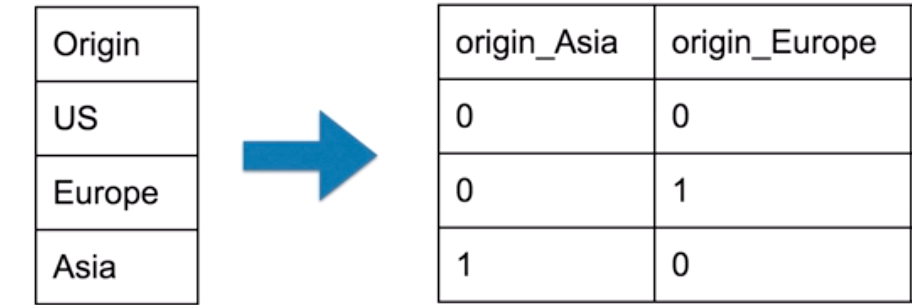


In [199]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


<p id ='Ecf'><p>
### Exploring categorical features

In [205]:
%matplotlib inline
gapminder.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')

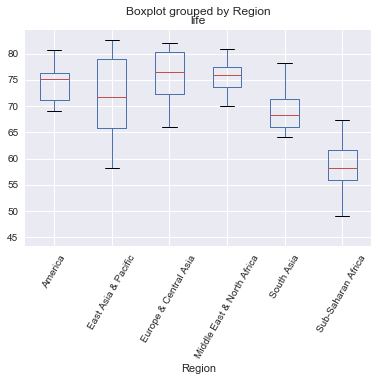

In [206]:
gapminder.boxplot('life', 'Region', rot=60)


<p id ='Cdv'><p>
### Creating dummy variables
Scikit-learn does not accept non-numerical features

In [207]:
dummy_gapminder = pd.get_dummies(gapminder)
dummy_gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


In [211]:
# Create dummy variables with drop_first=True: df_region
dummy_gapminder = pd.get_dummies(gapminder, drop_first=True)
dummy_gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [214]:
dummy_gapminder.shape

(139, 14)

<p id ='Rwcf'><p>
### Regression with categorical features
Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

  

In [213]:
y = dummy_gapminder.life.values
y

array([75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1,
       79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2,
       56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8,
       78.7, 61. , 74. , 70.1, 74.1, 56.7, 60.4, 74. , 65.7, 79.4, 81. ,
       57.5, 62.2, 72.1, 80. , 62.7, 79.5, 70.8, 58.3, 51.3, 63. , 61.7,
       70.9, 73.8, 82. , 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6,
       66.1, 61.5, 72.3, 77.6, 45.2, 61. , 72. , 80.7, 63.4, 51.4, 74.5,
       78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55. , 60.8,
       68.6, 80.3, 80.2, 75.2, 59.7, 58. , 80.7, 74.6, 64.1, 77.1, 58.2,
       73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4,
       55.9, 80.9, 74.8, 78.5, 56.7, 55. , 81.1, 74.3, 67.4, 69.1, 46.1,
       81.1, 81.9, 69.5, 59.7, 74.1, 60. , 71.3, 76.5, 75.1, 57.2, 68.2,
       79.5, 78.2, 76. , 68.7, 75.4, 52. , 49. ])

In [217]:
X = dummy_gapminder.drop(['life'], axis=1).values
X

array([[3.4811059e+07, 2.7300000e+00, 1.0000000e-01, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9842251e+07, 6.4300000e+00, 2.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.0381860e+07, 2.2400000e+00, 5.0000000e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [8.6589342e+07, 1.8600000e+00, 4.0000000e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3114579e+07, 5.8800000e+00, 1.3600000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3495462e+07, 3.8500000e+00, 1.5100000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [218]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


In [220]:
ridge = Ridge(normalize=True, alpha=0.5)

In [222]:
ridge_cv= cross_val_score(ridge, X, y, cv = 5)

In [223]:
ridge_cv

array([0.86808336, 0.80623545, 0.84004203, 0.7754344 , 0.87503712])

<p id ='Hmd'><p>
### Handling missing data

In [254]:
df = pd.read_csv('./data/house-votes-84.csv', header=None, names =['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'] )
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [255]:
df[df=='?'] =np.nan
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


<p id ='Dmd'><p>
### Dropping missing data

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null object
water                387 non-null object
budget               424 non-null object
physician            424 non-null object
salvador             420 non-null object
religious            424 non-null object
satellite            421 non-null object
aid                  420 non-null object
missile              413 non-null object
immigration          428 non-null object
synfuels             414 non-null object
education            404 non-null object
superfund            410 non-null object
crime                418 non-null object
duty_free_exports    407 non-null object
eaa_rsa              331 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


In [257]:
print("Shape of Original DataFrame: {}".format(df.shape))
# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


<p id ='ImdiaMPI'><p>
### Imputing missing data in a ML Pipeline I

There are many steps to building a model,
from creating training and test sets,
to fitting a classifier or regressor, 
to tuning its parameters, 
to evaluating its performance on new data.
 
Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline.

Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.



In [263]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


In [264]:
# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis = 0 )

In [265]:
# Instantiate the SVC classifier: clf
clf = SVC()

In [266]:
# Setup the pipeline with the required steps: steps
steps = [('imputation', imp), ('SVM', clf)]

In [267]:
#Create the pipeline 
pipline = Pipeline(steps)

In [270]:
df.shape

(232, 17)

<p id ='ImdiaMPI'><p>
### Imputing missing data in a ML Pipeline II

In [276]:
df = pd.read_csv('./data/house-votes-84.csv', header=None, names =['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'] )
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [277]:
df[df=='?'] =np.nan
df.shape

(435, 17)

In [287]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null float64
water                387 non-null float64
budget               424 non-null float64
physician            424 non-null float64
salvador             420 non-null float64
religious            424 non-null float64
satellite            421 non-null float64
aid                  420 non-null float64
missile              413 non-null float64
immigration          428 non-null float64
synfuels             414 non-null float64
education            404 non-null float64
superfund            410 non-null float64
crime                418 non-null float64
duty_free_exports    407 non-null float64
eaa_rsa              331 non-null float64
dtypes: float64(16), object(1)
memory usage: 57.9+ KB


In [289]:
X = df.drop('party', axis = 1).values
y = df.party

In [290]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [291]:
X_train

array([[ 0.,  1.,  1., ...,  0.,  1.,  1.],
       [ 1., nan,  1., ...,  0.,  1., nan],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  0.,  1.,  1.],
       [ 1.,  0.,  1., ...,  0.,  1., nan],
       [ 1.,  0.,  1., ...,  1.,  1., nan]])

In [294]:
y_train.shape

(304,)

In [293]:
pipline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [298]:
y_pred = pipline.predict(X_test)

In [300]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.99      0.96      0.98        85
 republican       0.94      0.98      0.96        46

avg / total       0.97      0.97      0.97       131



<p id ='Cas'><p>
### Centering and scaling

Why scale your data?
* Many models uses some form of distance to inform them.
* Features on larger scales can induly effect your data.

Ways to Normalize your data?
* Standardization:  Subtract the mean and divide by variance.
* Can also normalize so that data ranges from -1 to 1.
* Can subtract the minimum and divide by range.

<p id ='Casyd'><p>
### Centering and scaling your data
How significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.



In [303]:
white_wine = pd.read_csv('./data/white-wine.csv')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [304]:
white_wine.quality.describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [306]:
white_wine.quality.drop_duplicates()

0      6
10     5
13     7
17     8
46     4
251    3
774    9
Name: quality, dtype: int64

 We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.

In [307]:
from sklearn.preprocessing import scale

In [308]:
X = white_wine.drop('quality', axis = 1).values
X.shape


(4898, 11)

In [310]:
y = white_wine.quality.values
y.shape

(4898,)

In [312]:
# Scale the features: X_scaled
X_scaled = scale(X)

In [316]:
print('Mean of unscaled features: {}'.format(np.mean(X)))  
print('Standard Deviation of unscaled features: {}'.format(np.std(X)))

Mean of unscaled features: 18.432687072460002
Standard Deviation of unscaled features: 41.54494764094571


In [318]:
print('Mean of scaled features: {}'.format(np.mean(X_scaled)))  
print('Standard Deviation of scaled features: {}'.format(np.std(X_scaled)))

Mean of scaled features: 2.7314972981668206e-15
Standard Deviation of scaled features: 0.9999999999999999


<p id ='Casiap'><p>
### Centering and scaling in a pipeline

In [320]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [321]:
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [324]:
knn_scaled = pipeline.fit(X_train, y_train)

In [325]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

In [326]:
# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled))
print('Accuracy without Scaling: {}'.format(knn_unscaled))


Accuracy with Scaling: Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])
Accuracy without Scaling: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


<p id ='BiatIPfc'><p>
### Bringing it all together I: Pipeline for classification
It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

The following modules have been pre-loaded: Pipeline, svm, train_test_split, GridSearchCV, classification_report, accuracy_score. The feature and target variable arrays X and y have also been pre-loaded.



In [335]:
pipeline = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])

In [336]:
parameters = {'svm__C':[1, 10, 100], 
             'svm__gamma':[0.1, 0.01]}
parameters

{'svm__C': [1, 10, 100], 'svm__gamma': [0.1, 0.01]}

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [338]:
cv = GridSearchCV(pipeline, parameters, cv = 5)


In [339]:
y.shape

(4898,)

In [340]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svm__C': [1, 10, 100], 'svm__gamma': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [341]:
y_pred = cv.predict(X_test)

In [342]:
# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.6081632653061224
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.24      0.39      0.30        28
          5       0.61      0.62      0.61       289
          6       0.66      0.66      0.66       447
          7       0.62      0.54      0.58       177
          8       0.47      0.42      0.44        38

avg / total       0.61      0.61      0.61       980

Tuned Model Parameters: {'svm__C': 100, 'svm__gamma': 0.1}


<p id ='BiatIPfr'><p>
### Bringing it all together II: Pipeline for regression

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.



In [343]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [347]:
steps = [('impute', Imputer(missing_values='NaN', strategy='mean', axis = 0)), 
   ('scaler', StandardScaler()), ('elasticnet', ElasticNet()) ]

In [348]:
pipeline = Pipeline(steps)

In [349]:
parameters = {'elasticnet__l1_ratio': np.linspace(0, 1,30)}

In [350]:
gm_cv = GridSearchCV(pipeline, parameters, cv = 5)

In [351]:
gm_cv.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('impute', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'elasticnet__l1_ratio': array([0.     , 0.03448, 0.06897, 0.10345, 0.13793, 0.17241, 0.2069 ,
       0.24138, 0.27586, 0.31034, 0.34483, 0.37931, 0.41379, 0.44828,
       0.48276, 0.51724, 0.55172, 0.58621, 0.62069, 0.65517, 0.68966,
       0.72414, 0.75862, 0.7931 , 0.82759, 0.86207, 0.89655, 0.93103,
       0.96552, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [352]:
# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.2098128901667343


<p id ='Ft'><p>
### Final thoughts